# Plasmid_data_analysis

Plasmid data analysis is a test jupyter noteboot to train into several python3 commands and data analysis tools:
    - urllib
    - pandas
    - matplotlib
    - etc.

First we need to download the file we are going to use from [ncbi](https://www.ncbi.nlm.nih.gov/) __FTP__ server:
[ftp://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/plasmids.txt](ftp://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/plasmids.txt).

For that we use urllib to retrieve the file containing all plasmid added to refseq database:

In [ ]:
import sys

print(sys.version)

#sys.path.append('usr/local/share/jupyter/kernels')
sys.path.append('~/env36/lib/python3.6/site-packages/')

In [ ]:
import urllib
import matplotlib
import pandas as pd

In [ ]:
#Alternate way to download the file (would need to storage in in a file)
#url = 'ftp://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/plasmids.txt'
#with urllib.request.urlopen(url) as plasmidurl:
#    plasmids = plasmidurl.read()

In [ ]:
#faster way to store the database in a file
url = 'ftp://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/plasmids.txt'
urllib.request.urlretrieve(url, 'plasmid_ddbb.txt')

The file downloaded is a TSV (tab-separated value) file with all plasmids added to the refseq database, which looks like that:

In [ ]:
with open("plasmid_ddbb.txt") as plasmid_ddbb:
    head = plasmid_ddbb.readlines()[0:10]
print(head)

This prints the top 10 lines of the file.

To see the same information in a human readable format we use pandas. 
With head command, we can see the top 10 rows of a pandas dataframe

In [4]:
#Add the TSV file into a pandas DataFrame 
plasmid_df = pd.read_csv("plasmid_ddbb.txt", sep='\t', header=0)
#other parameters nrows=5

In [17]:
plasmid_df.head(10)

,#Organism/Name,Kingdom,Group,SubGroup,Plasmid Name,RefSeq,INSDC,Size (Kb),GC%,Protein,rRNA,tRNA,Other RNA,Gene,Pseudogene
0,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB1,NC_009926.1,CP000838,374.161,47.3483,309,-,-,-,333,24
1,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB2,NC_009927.1,CP000839,356.087,45.3367,336,-,-,-,360,24
2,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB3,NC_009928.1,CP000840,273.121,45.1902,250,-,-,-,290,40
3,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB4,NC_009929.1,CP000841,226.680,45.8770,209,-,-,-,225,16
4,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB5,NC_009930.1,CP000842,177.162,44.6755,176,-,-,-,179,3
5,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB6,NC_009931.1,CP000843,172.728,47.1267,152,-,-,-,165,13
6,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB7,NC_009932.1,CP000844,155.110,45.5909,130,-,-,-,136,6
7,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB8,NC_009933.1,CP000845,120.693,45.4185,103,-,-,-,109,6
8,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB9,NC_009934.1,CP000846,2.133,42.5223,2,-,-,-,3,1
9,Acetobacter aceti,Bacteria,Proteobacteria,Alphaproteobacteria,pAC5,NC_001275.1,AF110140,5.123,55.8657,2,-,-,-,2,-


In [15]:
#The function shape tell us the DF dimensions 
print('This database has %s plasmids with information of %s features:' %  plasmid_df.shape)
for feature in plasmid_df.columns:
    print("- " + feature)

This database has 14406 plasmids with information of 15 features:
- #Organism/Name
- Kingdom
- Group
- SubGroup
- Plasmid Name
- RefSeq
- INSDC
- Size (Kb)
- GC%
- Protein
- rRNA
- tRNA
- Other RNA
- Gene
- Pseudogene


In [20]:
plasmid_df.describe()

,Size (Kb),GC%
count,14406.000000,14406.000000
mean,111.212034,45.939259
std,241.435367,11.771237
min,0.537000,0.000000
25%,11.975000,35.878950
50%,48.867500,46.729050
75%,111.692750,54.125875
max,5836.680000,87.477300


In [22]:
plasmid_df['rRNA'].describe()

count     14406
unique       14
top           -
freq      14233
Name: rRNA, dtype: object

In [23]:
plasmid_df[['#Organism/Name','Kingdom','Group','SubGroup']].describe()

,#Organism/Name,Kingdom,Group,SubGroup
count,14406,14406,14406,14406
unique,3230,4,22,57
top,Escherichia coli,Bacteria,Proteobacteria,Gammaproteobacteria
freq,1151,14094,8604,6214


In [ ]:
#locate a specific plasmid
#plasmid_df.iloc[4497]
#plasmid_df['Plasmid Name']

The key fields are completelly filled. Fieds such 'rRNA', 'tRNA' or 'Other RNA' have many missing values. As an attemp to clean them we can make a copy and replace '-' for 'NaN' to find out if those missing values alter descriptive stats. We will find out later that this is __not__ the case.

In [ ]:
plasmid_missing = plasmid_df.copy()
plasmid_na = plasmid_missing.replace('-', 'NaN')
#plasmid_na

In [ ]:
print(plasmid_df['rRNA'].describe(), plasmid_na['rRNA'].describe())


Plasmids are very promiscuous structuresthat can be transfered within different species so, to find a relationship within species and other feature, we first need to use only genus and species, not the fields supplied that includes the variety, interpreted as different organism.

We can do it easily with string manipulation.

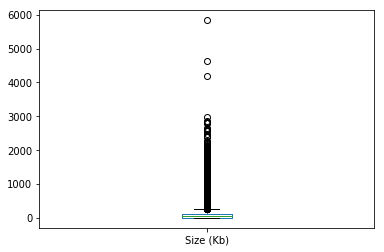

In [30]:
plasmid_df[['Group', 'Size (Kb)']].plot.box()
#plasmid_df
#plasmid_size.colum = "Size"
#plasmid_size
#plasmid_size['double size'] = plasmid_df['Size (Kb)']*2


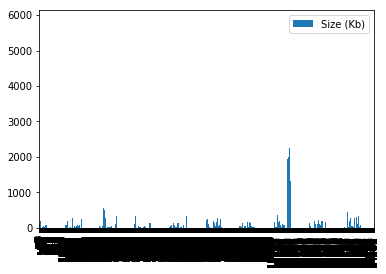

In [31]:
plasmid_df[['Kingdom', 'Size (Kb)']].plot.bar()


### Author: pedroscampoy@gmail.com
#### TUTORIAL UNDER CONSTRUCTION